In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

normalization the img val (pixl) from [0,255] to [0,1]

In [3]:
# Define the normalization function
def normalize_values(x):
    return x / 255

# Apply the function to each cell in the DataFrame, excluding the 'label' column
train.iloc[:, 1:] = train.iloc[:, 1:].applymap(normalize_values)

# Display the updated DataFrame
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA

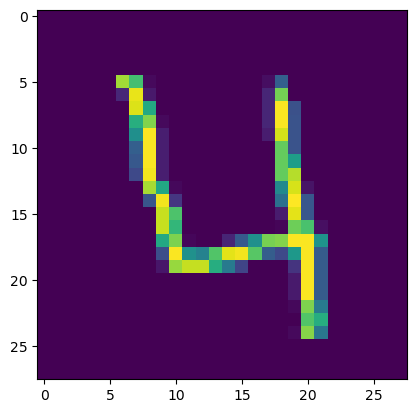

In [4]:
# Display the digit at index 3.
plt.imshow(train.iloc[3,1:].values.reshape(28,28))

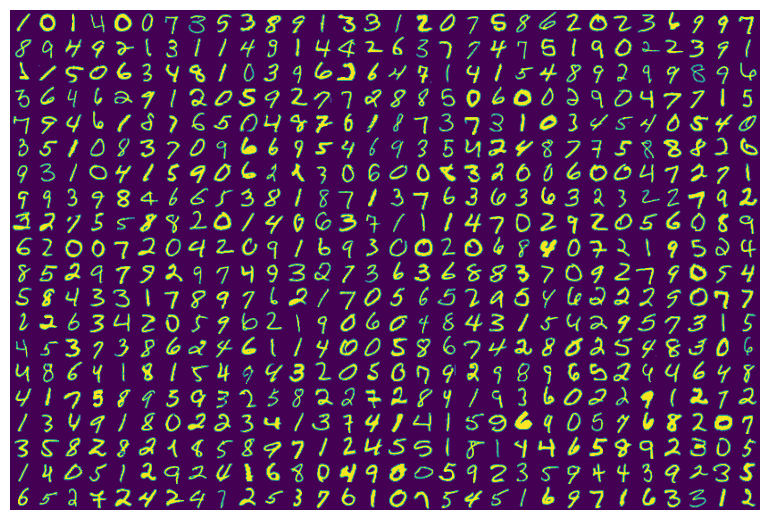

In [5]:
import matplotlib.pyplot as plt

# Create a figure with a 5 by 5 grid of subplots
fig, axes = plt.subplots(20, 30, figsize=(10, 10))

# Iterate over the subplots and display the images
for i, ax in enumerate(axes.flat):
    # Check if index i is within the range of the DataFrame
    if i < 20*30:
        ax.imshow(train.iloc[i, 1:].values.reshape(28, 28))
        ax.axis('off')  # Turn off axis labels
#     else:
#         ax.axis('off')  # Turn off empty subplots

plt.subplots_adjust(left=0, right=0.75, top=0.5, bottom=0, wspace=0, hspace=0)


        
plt.show() 

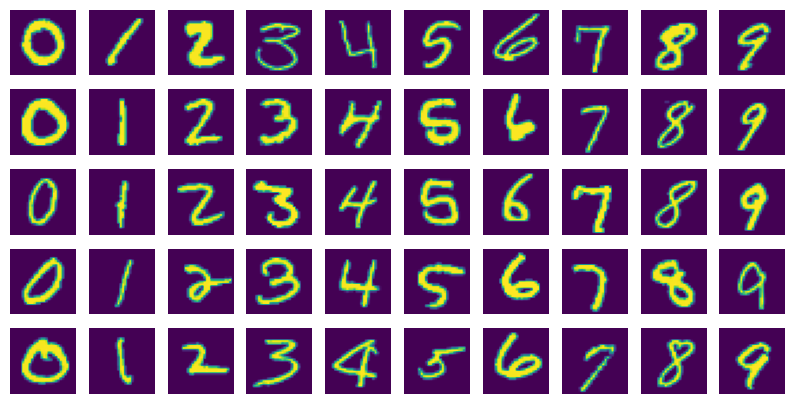

In [6]:
# Display digit sample
rows = 5
fig, axes = plt.subplots(rows, 10, figsize=(10 ,rows))

for i in range (10 ):
    ds  = train[train.label == i]
    for j in range(rows):
        ax = axes[j,i]
        ax.imshow(ds.iloc[j,1:].values.reshape(28,28))
        ax.axis('off')
        
plt.show() 

## mean digit

In [7]:

# Function to compute average value for a specific digit label
def number_col_avg(label, df):
    return df[df['label'] == label].mean(axis=0).drop('label')

# Loop to compute average value for each digit label and create avg_digit DataFrame
avg_digit_data = {}
for label in range(10):
    avg_digit_data[label] = number_col_avg(label, train) 

# Create DataFrame avg_digit
avg_digit = pd.DataFrame(avg_digit_data)

# Display mean_digit
mean_digit =avg_digit.T
mean_digit

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007242,0.003683,0.001558,0.000339,0.000463,0.000107,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001014,0.000735,0.000684,0.000438,0.000191,0.000000,0.0,0.0,0.0,0.0


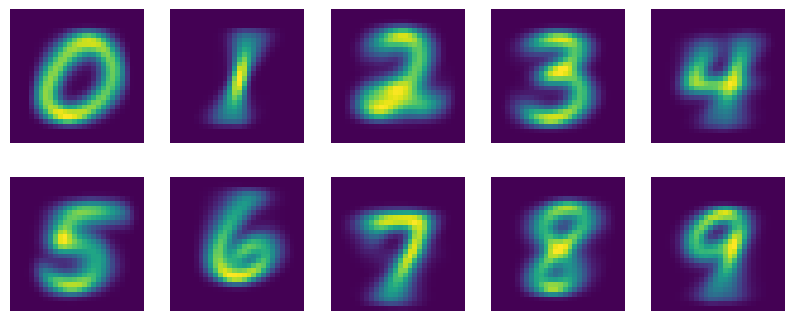

In [8]:
# Display mean_digit
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i in range(10):
    ax = axes[i // 5, i % 5]  # Calculate the subplot position
    ax.imshow(mean_digit.iloc[i].values.reshape(28, 28) )#, cmap='gray')
    ax.axis('off')  # Optionally turn off the axis

plt.show()      


## num of significant pixl (for counting the num of significant pixl )

In [9]:
# pixl val > 0.061
def replace_values(x):
    if x > 0.061:
        return 1
    else:
        return 0  

coupt = mean_digit.copy()   
coupt = coupt.applymap(replace_values)

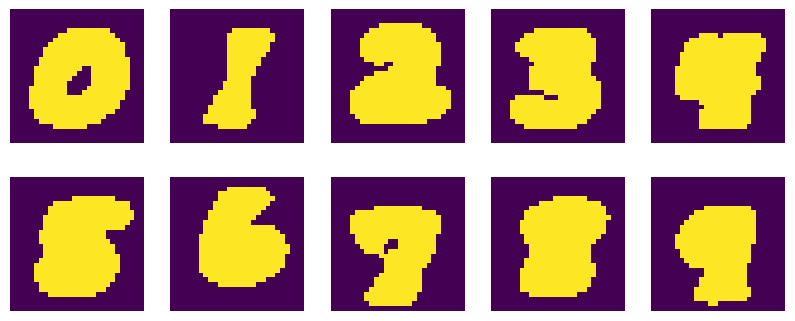

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i in range(10):
    ax = axes[i // 5, i % 5]  # Calculate the subplot position
    ax.imshow(coupt.iloc[i].values.reshape(28, 28) )#, cmap='gray')
    ax.axis('off')  # Optionally turn off the axis

plt.show()   

In [11]:
# pixl val > 0.35

def replace_values(x):
    if x > 0.35:
        return 1
    else:
        return 0  

temp = mean_digit.copy()   
temp = temp.applymap(replace_values)

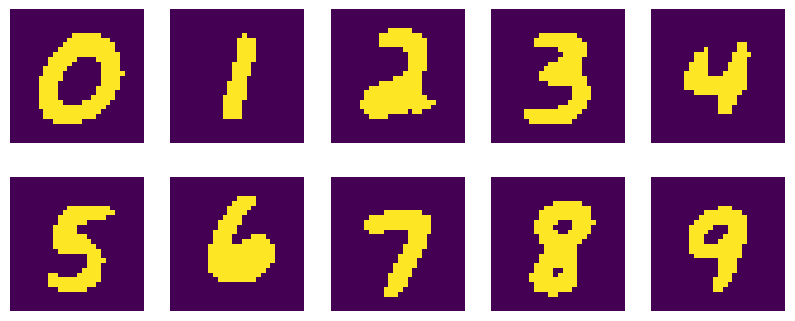

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i in range(10):
    ax = axes[i // 5, i % 5]  # Calculate the subplot position
    ax.imshow(temp.iloc[i].values.reshape(28, 28) )#, cmap='gray')
    ax.axis('off')  # Optionally turn off the axis

plt.show()   

## Histogram showing the distribution of pixels in each digit.

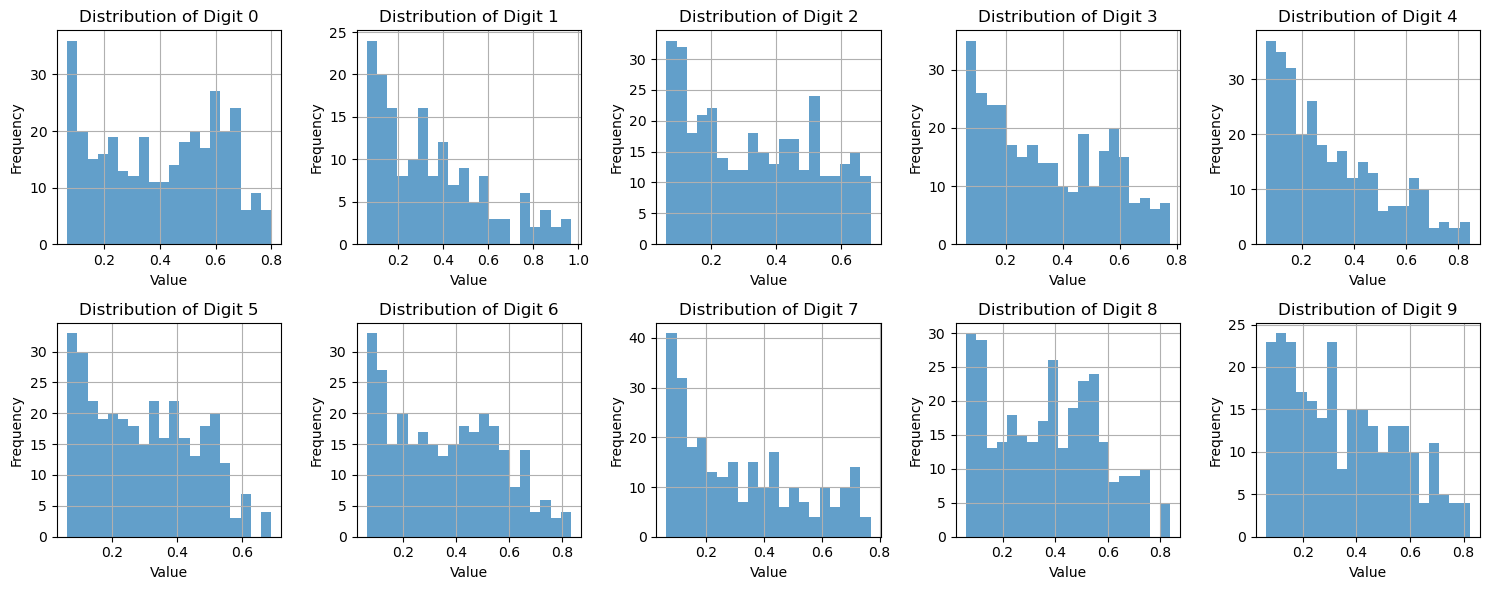

In [13]:

def plot_distribution(dataframe):
    # Create a figure and axes for subplots
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten()
    
    # Iterate over columns in the DataFrame
    for i, column in enumerate(dataframe.columns):
        # Filter the DataFrame to include only values greater than 0.061 in the current column
        filtered_data = dataframe[dataframe[column] > 0.061][column]
        # Plot histogram for the current column
        axes[i].hist(filtered_data, bins=20, alpha=0.7)
        axes[i].set_title('Distribution of Digit {}'.format(column))
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Assuming your DataFrame is called 'mean_digit'
plot_distribution(mean_digit.T)


### Histogram showing the distribution of pixels in all digit.

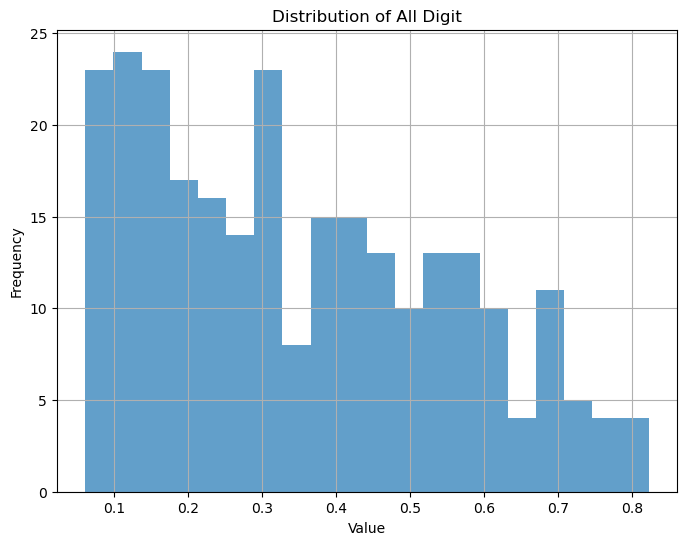

In [14]:

def plot_distribution(dataframe):
    # Flatten the DataFrame into a single Series
    for column in dataframe.columns:
        data = dataframe[dataframe[column] > 0.06][column].values.flatten()
    
    # Plot the distribution
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=20, alpha=0.7)
    plt.title('Distribution of All Digit')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

plot_distribution(mean_digit.T)

## Number of parameters in each digit in the mean_digit matrix.

In [15]:
# mean_digit Sum Num of pix(>0.35) and Mean of pix va
# Calculate the four vectors
sum_mean_digit = mean_digit.T.sum() #max 0 min 1 and 4, 7
sum_coupt = coupt.T.sum() #max 2,0,5 min 1
sum_temp = temp.T.sum() #max 2,0,5 min 1

mean_mean_digit = mean_digit.T.mean() #max 0, 2, 8 min 1
#ratio = mean_mean_digit*255/sum_temp #not imformativ for me
#ratio=mean_mean_digit*sum_temp*7

# Create a DataFrame
df = pd.DataFrame([sum_mean_digit, sum_temp, mean_mean_digit])

# Display the DataFrame
df=df.T
Value=['Sum of pix val', 'Num of pix(>0.3)',  'Mean of pix val']
df.columns = [Value] 
df.round(2)

,Sum of pix val,Num of pix(>0.3),Mean of pix val
0,135.81,187.0,0.17
1,59.56,69.0,0.08
2,117.14,156.0,0.15
3,111.06,141.0,0.14
4,95.03,107.0,0.12
5,101.32,127.0,0.13
6,108.76,152.0,0.14
7,89.93,112.0,0.11
8,118.37,169.0,0.15
9,96.29,122.0,0.12


## Number of each digit in the dataset.

In [16]:
# Num of Digit in train Data
label_counts = train['label'].value_counts()

# Display the counts of digit
label_counts = pd.DataFrame(label_counts)
label_counts


,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


# Prediction using the mean digit (vactor 11 row (10digit+1label) ,max val index is the digit, 10 is the label)

In [17]:
#  predict by mean_digit@img of digit
def predict_chans(i):
    given_v = train.iloc[i,1:].values
    arr = pd.Series(mean_digit@given_v)
    new_arr = pd.concat( [arr,train.iloc[i,:1]], ignore_index=True)
    return pd.Series(new_arr)
# Initialize an empty list to collect arrays
array_list = []  

for i in range(len(train)):
    temp = predict_chans(i)  
    array_list.append(temp)

# Concatenate all DataFrames in the list into a single DataFrame
new_train = pd.concat(array_list, axis=1).T

In [18]:
new_train

,0,1,2,3,4,5,6,7,8,9,10
0,20.491331,25.269608,28.190574,26.260635,17.872413,21.307377,18.641746,14.192818,32.219545,17.840921,1.0
1,88.153492,22.950466,59.266248,56.694622,39.968132,48.573970,52.637434,41.978567,56.910200,42.071891,0.0
2,18.744040,28.891327,22.904690,23.741132,16.426923,20.807395,23.623398,20.234911,27.351842,20.902022,1.0
3,20.356075,6.268881,20.772845,14.348766,19.317452,13.064609,20.812772,15.680947,16.254629,16.947954,4.0
4,96.504698,23.556774,62.171320,60.250313,41.517185,52.176823,50.922055,43.283584,59.240626,44.146011,0.0
...,...,...,...,...,...,...,...,...,...,...,...
41995,57.142388,13.660160,29.307907,34.377260,21.947386,33.774441,22.328518,23.805229,36.341457,26.887169,0.0
41996,15.864362,31.037538,23.532598,25.370388,17.839029,20.181456,21.358676,21.101902,28.088726,23.456723,1.0
41997,53.868534,19.669854,33.852136,40.837172,39.230987,39.484653,36.099302,53.841206,43.986493,46.811420,7.0
41998,47.957106,21.105507,40.451984,31.517333,33.092034,34.566388,53.744224,28.754063,36.818078,33.290268,6.0


# Evaluate  mean digit model prediction.

In [19]:
# For accuracy_score and confusion_matrix to Check model accuracy
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix



In [20]:
df_without_last_column = new_train.iloc[:, :-1].copy()
df_without_last_column 

,0,1,2,3,4,5,6,7,8,9
0,20.491331,25.269608,28.190574,26.260635,17.872413,21.307377,18.641746,14.192818,32.219545,17.840921
1,88.153492,22.950466,59.266248,56.694622,39.968132,48.573970,52.637434,41.978567,56.910200,42.071891
2,18.744040,28.891327,22.904690,23.741132,16.426923,20.807395,23.623398,20.234911,27.351842,20.902022
3,20.356075,6.268881,20.772845,14.348766,19.317452,13.064609,20.812772,15.680947,16.254629,16.947954
4,96.504698,23.556774,62.171320,60.250313,41.517185,52.176823,50.922055,43.283584,59.240626,44.146011
...,...,...,...,...,...,...,...,...,...,...
41995,57.142388,13.660160,29.307907,34.377260,21.947386,33.774441,22.328518,23.805229,36.341457,26.887169
41996,15.864362,31.037538,23.532598,25.370388,17.839029,20.181456,21.358676,21.101902,28.088726,23.456723
41997,53.868534,19.669854,33.852136,40.837172,39.230987,39.484653,36.099302,53.841206,43.986493,46.811420
41998,47.957106,21.105507,40.451984,31.517333,33.092034,34.566388,53.744224,28.754063,36.818078,33.290268


In [21]:
# Replace the maximum value with its index. 
def replace_max_within_column(df):
    # Find the column index of the maximum value in each row
    max_indices = df.idxmax(axis=1)
    
    # Create a new DataFrame to store the results
    result_df = pd.DataFrame({'bb': df.index})
    
    # Add the column names corresponding to the maximum values for each row
    result_df['Max_Column'] = df.columns[max_indices.values]
    
    return result_df

In [22]:
result = replace_max_within_column(df_without_last_column)
result=result.drop(['bb'], axis=1)
ans = new_train.iloc[:,-1:].copy()

y_test = ans
y_pred = result

In [23]:
#Model (mean_digit) applied to the digit image (matrix dot product: (mean_digit)@(img of digit)).
accuracy = accuracy_score(y_test, y_pred)
print('accuracy of model: ',round(accuracy,3)) 

accuracy of model:  0.621


In [24]:
# Calculate confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
cm

,0,1,2,3,4,5,6,7,8,9
0,4043,0,7,2,0,0,18,0,62,0
1,4,2096,17,18,0,0,18,1,2530,0
2,505,1,2858,104,12,0,176,8,504,9
3,425,0,76,3034,0,0,31,3,775,7
4,380,0,43,18,1875,0,176,3,897,680
5,1716,0,41,496,6,0,71,0,1432,33
6,580,0,51,1,2,0,3294,0,209,0
7,512,0,49,35,14,0,15,2639,789,348
8,226,0,12,114,1,0,23,0,3681,6
9,405,1,39,66,40,0,9,21,1051,2556


<Axes: >

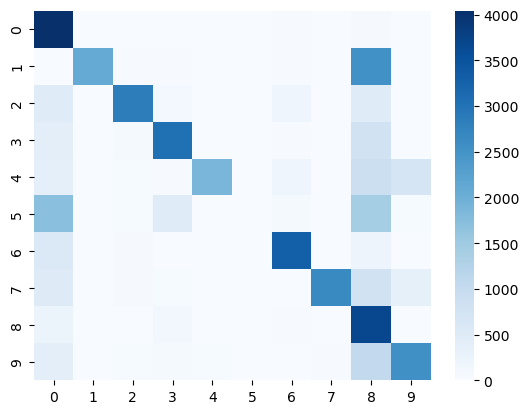

In [25]:
# heatmap of confusion matrix
sns.heatmap(cm,cmap="Blues")

### 5 not found at all(?). 8 & 0 are over-dominant. 1 is under-dominant. 7, 4, and a little bit 9 are under-dominant.


In [26]:
round(mean_digit.T.sum(),0)

0    136.0
1     60.0
2    117.0
3    111.0
4     95.0
5    101.0
6    109.0
7     90.0
8    118.0
9     96.0
dtype: float64

# Normalize by pixel number weight.


In [27]:
new_train

,0,1,2,3,4,5,6,7,8,9,10
0,20.491331,25.269608,28.190574,26.260635,17.872413,21.307377,18.641746,14.192818,32.219545,17.840921,1.0
1,88.153492,22.950466,59.266248,56.694622,39.968132,48.573970,52.637434,41.978567,56.910200,42.071891,0.0
2,18.744040,28.891327,22.904690,23.741132,16.426923,20.807395,23.623398,20.234911,27.351842,20.902022,1.0
3,20.356075,6.268881,20.772845,14.348766,19.317452,13.064609,20.812772,15.680947,16.254629,16.947954,4.0
4,96.504698,23.556774,62.171320,60.250313,41.517185,52.176823,50.922055,43.283584,59.240626,44.146011,0.0
...,...,...,...,...,...,...,...,...,...,...,...
41995,57.142388,13.660160,29.307907,34.377260,21.947386,33.774441,22.328518,23.805229,36.341457,26.887169,0.0
41996,15.864362,31.037538,23.532598,25.370388,17.839029,20.181456,21.358676,21.101902,28.088726,23.456723,1.0
41997,53.868534,19.669854,33.852136,40.837172,39.230987,39.484653,36.099302,53.841206,43.986493,46.811420,7.0
41998,47.957106,21.105507,40.451984,31.517333,33.092034,34.566388,53.744224,28.754063,36.818078,33.290268,6.0


# Look for model improvement by normalizing the model matrix (mean_digit) with 'divisor' weight.

In [28]:
# Series for division

divisor = pd.Series([1.15,  0.79,0.98, 1, 0.90, 0.86, 0.985,  0.89, 1.047, 0.94,1]) 

# divisor = pd.Series([1.01,0.99,1.01,0.99,0.97,1.01,1.01,0.98,1.02,1,1])

# Divide each column by corresponding value in the divisor Series
normal_new_train = new_train.div(divisor, axis=1)

In [29]:
# Drop the label (10).

df_without_last_column = normal_new_train.iloc[:, :-1].copy()

# Predict the label of the digit by the maximum value in the 10th place vector.
result = replace_max_within_column(df_without_last_column)
result=result.drop(['bb'], axis=1)

# the label of the digit
ans = normal_new_train.iloc[:,-1:].copy()

# accuracy score
y_test = ans
y_pred = result
accuracy_score(y_test, y_pred) 

0.8190714285714286

In [30]:
# Calculate confusion matrix

cm2 = confusion_matrix(y_test, y_pred)
cm2 = pd.DataFrame(cm2)
cm2

,0,1,2,3,4,5,6,7,8,9
0,3757,0,31,9,5,157,119,2,50,2
1,0,4230,106,20,0,47,15,4,260,2
2,73,67,3424,121,74,12,169,62,158,17
3,43,28,207,3399,4,212,55,39,296,68
4,21,35,35,0,3208,10,108,15,130,510
5,119,71,121,446,71,2600,114,23,150,80
6,100,46,122,3,27,99,3707,0,33,0
7,79,107,98,9,67,6,8,3689,125,213
8,30,66,80,313,24,159,46,19,3221,105
9,72,39,47,72,363,35,10,206,178,3166


<Axes: >

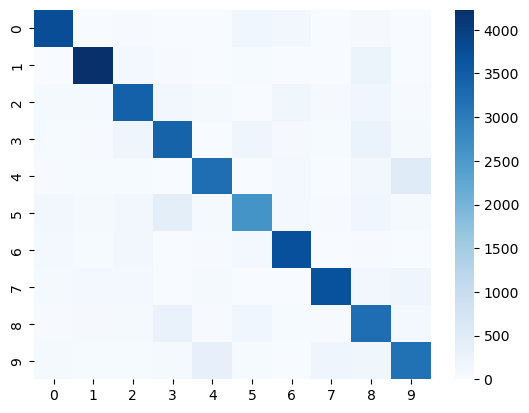

In [31]:
# heatmap of confusion matrix
sns.heatmap(cm2,cmap="Blues")

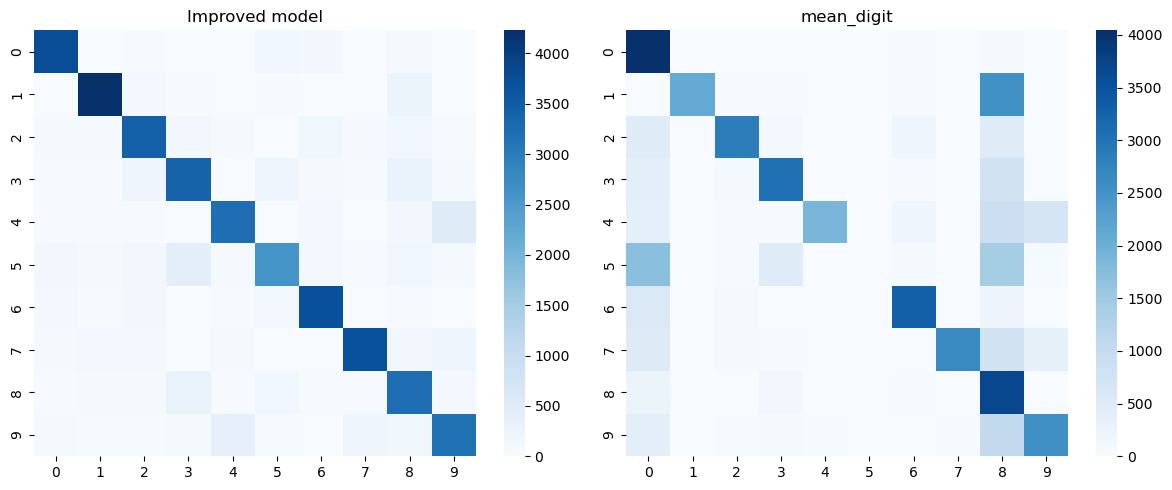

In [32]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first heatmap on the left subplot
sns.heatmap(cm2, cmap="Blues", ax=axes[0])
axes[0].set_title('Improved model')

# Plot the second heatmap on the right subplot
sns.heatmap(cm, cmap="Blues", ax=axes[1])
axes[1].set_title('mean_digit')



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Update the model

In [33]:
divisor = pd.Series([1.15,  0.79,0.98, 1, 0.90, 0.86, 0.985,  0.89, 1.047, 0.94]) 

# Divide each column by corresponding value in the divisor Series
normal_pridiction = mean_digit.T.div(divisor, axis=1)
normal_pridiction = normal_pridiction.T

In [34]:
# # normal_pridiction use in predict
# def pred_chans(i):
#     given_v = train.iloc[i,1:].values
#     arr = pd.Series(normal_pridiction@given_v)
#     new_arr = pd.concat( [arr,train.iloc[i,:1]], ignore_index=True)
#     return pd.Series(new_arr)
# # Initialize an empty list to collect arrays
# array_list = []

# for i in range(len(train)):
#     temp = pred_chans(i)  # Assuming for_train(i) returns a numpy array
#     array_list.append([temp])

# # Concatenate all arrays in the list into a single array
# new_train = np.concatenate(array_list, axis=0)
# new_train= pd.DataFrame(new_train)
# new_train

In [35]:
# df_without_last_column = new_train.iloc[:, :-1].copy()

# result = replace_max_within_column(df_without_last_column)
# result=result.drop(['bb'], axis=1)


# ans = normal_new_train.iloc[:,-1:].copy()
# y_test = ans
# y_pred = result
# accuracy_score(y_test, y_pred) 

# For Kaggle submission, run the model on the test data.

In [36]:
test = pd.read_csv('test.csv')

In [37]:
def normaliz_values(x):
        return x/255
    
# Apply the function to each cell in the DataFrame, excluding the 'label' column
for column in test:
    test[column] = test[column].apply(normaliz_values)

# Display the updated DataFrame
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
def pred_chans(i):
    given_v = test.iloc[i,:].values
    arr = pd.Series(normal_pridiction@given_v)
    new_arr = pd.concat( [arr], ignore_index=True)
    return pd.Series(new_arr)
# Initialize an empty list to collect arrays
array_list = []

for i in range(len(test)):
    temp = pred_chans(i)  # Assuming for_train(i) returns a numpy array
    array_list.append([temp])

# Concatenate all arrays in the list into a single array
new_train = np.concatenate(array_list, axis=0)
new_train= pd.DataFrame(new_train)
new_train

,0,1,2,3,4,5,6,7,8,9
0,56.185634,35.138829,68.305175,45.682144,49.198824,47.147213,55.846593,42.143646,52.417113,45.614699
1,67.935476,29.293799,48.833240,43.062143,37.838343,54.247167,46.806888,47.930310,45.459427,42.525035
2,18.923563,20.566550,22.934696,21.653498,25.023895,25.617032,21.887694,23.288259,28.178105,27.162679
3,23.069794,17.092272,28.363760,16.695600,30.393415,21.574430,28.143659,30.425598,25.273733,29.789498
4,32.738855,33.904034,45.670394,44.864363,30.395377,38.198633,38.983536,30.789887,40.088576,30.641764
...,...,...,...,...,...,...,...,...,...,...
27995,32.970606,21.846778,38.583853,40.293807,48.074580,40.494850,38.697851,42.852749,40.301243,49.972424
27996,18.301372,8.933891,17.041135,19.945001,22.265248,19.995874,16.893958,29.280216,18.504508,26.390699
27997,33.554974,33.602513,36.970179,53.705502,30.395271,43.593850,28.124876,33.179277,43.835249,34.465965
27998,36.147563,30.172864,37.411261,45.187886,50.152822,47.236818,42.239477,43.980277,45.502411,54.944938


In [39]:
result = replace_max_within_column(new_train)
result=result.drop(['bb'], axis=1)
result = result.assign(ImageId=range(1, len(result) + 1)).rename(columns={'Max_Column': 'Label'})
result  = result[['ImageId', 'Label']]
result

,ImageId,Label
0,1,2
1,2,0
2,3,8
3,4,7
4,5,2
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [40]:
result.to_csv("my ans.csv",index=False)

# The model of mean_digit normalized by divisor vector had a score of 0.82.

## The divisor vector can be improved with a function (it was created manually).

### Now, I want to center the prediction matrix (normalized_prediction) and the data picture.

openCV ...